<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Copy_of_Vera_Mendes_DS8_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
from statistics import mean, stdev
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, t, ttest_1samp

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-18 04:56:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-09-18 04:56:51 (610 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
# Load Data
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                        'budget','physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups','anti-satellite-ban',
                        'aid-to-contras','mx-missile','immigration',
                        'synfuels', 'education', 'right-to-sue','crime',
                        'duty-free','south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# cleaning data
# replace N by 1 Y by 2 and ? by 0
df = df.replace({'?':0, 'n':1, 'y':2})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,republican,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,democrat,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,democrat,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,democrat,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2


In [0]:
# issues = df.columns
# print(issues)

In [0]:
# Filtering df into democrats & republicans dfs

dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,republican,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
7,republican,1,2,1,2,2,2,1,1,1,1,1,1,2,2,0,2
8,republican,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,2
10,republican,1,2,1,2,2,1,1,1,1,1,0,0,2,2,1,1


In [0]:
rep.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000
mean,1.166667,1.327381,1.107143,1.952381,1.916667,1.875000,1.196429,1.077381,1.095238,1.529762,1.071429,1.72619,1.750000,1.898810,1.011905,1.440476
std,0.419105,0.679001,0.379658,0.285572,0.335819,0.366036,0.480256,0.451173,0.350160,0.535289,0.417742,0.59642,0.555323,0.418722,0.394393,0.715126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,2.000000,2.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.00000,2.000000,2.000000,1.000000,2.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.00000,2.000000,2.000000,1.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000


In [0]:
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,democrat,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,democrat,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2
5,democrat,1,2,2,1,2,2,1,1,1,1,1,1,2,2,2,2
6,democrat,1,2,1,2,2,2,1,1,1,1,1,1,0,2,2,2


In [0]:
dem.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,1.550562,1.344569,1.838951,1.022472,1.161049,1.426966,1.719101,1.801498,1.632959,1.449438,1.438202,1.067416,1.217228,1.299625,1.539326,1.340824
std,0.562177,0.661224,0.433880,0.286705,0.475232,0.559692,0.512742,0.435628,0.613231,0.527683,0.580803,0.445472,0.532411,0.534628,0.608020,0.917632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [0]:
means = pd.DataFrame({'Democrats': dem.mean(),'Republicans': rep.mean()})
means

,Democrats,Republicans
handicapped-infants,1.550562,1.166667
water-project,1.344569,1.327381
budget,1.838951,1.107143
physician-fee-freeze,1.022472,1.952381
el-salvador-aid,1.161049,1.916667
religious-groups,1.426966,1.875000
anti-satellite-ban,1.719101,1.196429
aid-to-contras,1.801498,1.077381
mx-missile,1.632959,1.095238
immigration,1.449438,1.529762


In [0]:
# Sample size
n_rep = rep.shape[0]
n_dem = dem.shape[0]

n = (n_rep + n_dem)
n

435

In [0]:
# Degrees of Freedom
dof = n-1
dof

434

In [0]:
# The Mean of Means:
mean = np.mean(df.mean())
mean

1.4352011494252874

In [0]:
# Standard Deviation
std = np.std(df.mean(), ddof=0)
std

0.08887710846018874

In [0]:
# Standard Error
std_err = std/n**.5
std_err

0.004261331184879666

In [0]:
CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (1.4268257370839936, 1.4435765617665812)


### Generally a issue has more probability of not passing than passing in Congress. In my data, 1.5 is the mid value for passing or not, null hypothesis.

In [0]:
# confidence interval for democrats voting yes or no in different issues

# Sample Size
nd = dem.shape[0]
# Degrees of Freedom
dofd = nd-1
# The Mean of Means:
meand = np.mean(dem.mean())
# Sample Standard Deviation
sample_stdd = np.std(dem.mean(), ddof=1)
# Standard Error
std_errd = sample_stdd/nd**.5
CId = t.interval(.95, dofd, loc=meand, scale=std_errd)
print("95% Confidence Interval: ", CId)

95% Confidence Interval:  (1.3985507032613522, 1.4577227049783479)



### Democrats have more probability of not passing a bill.

In [0]:
# confidence interval for republicans voting yes or no in different issues

# Sample Size
nr = rep.shape[0]
# Degrees of Freedom
dofr = nr-1
# The Mean of Means:
meanr = np.mean(rep.mean())
# Sample Standard Deviation
sample_stdr = np.std(rep.mean(), ddof=1)
# Standard Error
std_errr = sample_stdr/nr**.5
CIr = t.interval(.95, dofr, loc=meanr, scale=std_errr)
print("95% Confidence Interval: ", CIr)

95% Confidence Interval:  (1.3921916078735077, 1.500665534983635)


### Republicans are passing more bills than democrats but still a big chance of not passing the bill. As the superior limit of the confidence interval just passes the null hypothesis.

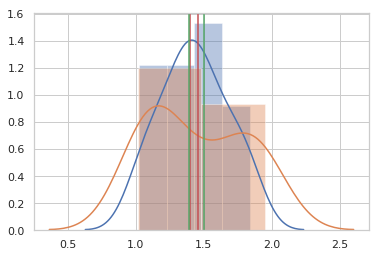

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

y1= dem.mean()
y2= rep.mean()

fix, ax = plt.subplots()
for value in [y1,y2]:
  sns.distplot(value)

plt.axvline(x= CId[0], color='r')
plt.axvline(x= CId[1], color='r')
plt.axvline(x= CIr[0], color='g')
plt.axvline(x= CIr[1], color='g');


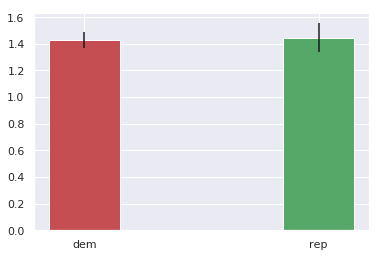

In [0]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)
ax.bar(x = "dem", height = meand, width=0.3, color='r', align='center', yerr = (CId[1]-CId[0]))
ax.bar(x = "rep", height = meanr , width=0.3, color='g', align='center', yerr = (CIr[1]-CIr[0]))

# plt.vlines(x=dem, ymin= CId[0], ymax=CId[1])
# plt.vlines(x=rep, ymin= CIr[0], ymax=CIr[1])

plt.show()

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # stderr = stats.sem(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print(margin_of_error)
  return (margin_of_error, mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
CIdem = confidence_interval(dem['handicapped-infants'])
CIdem

0.06774012329186936


(0.06774012329186936,
 1.550561797752809,
 1.4828216744609397,
 1.6183019210446783)

In [0]:
CIrep = confidence_interval(rep['handicapped-infants'])
CIrep

0.06383731158544707


(0.06383731158544707,
 1.1666666666666667,
 1.1028293550812196,
 1.2305039782521139)

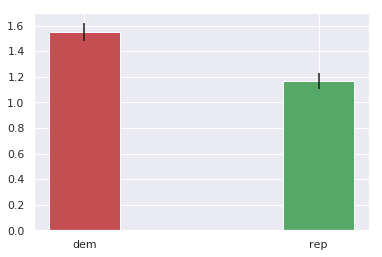

In [0]:
import matplotlib.pyplot as plt 

ax = plt.subplot(111)
ax.bar(x = "dem", height = dem['handicapped-infants'].mean(), width=0.3, color='r', align='center', yerr = CIdem[0])
ax.bar(x = "rep", height = rep['handicapped-infants'].mean() , width=0.3, color='g', align='center', yerr = CIrep[0])

# plt.vlines(x=dem, ymin= CId[0], ymax=CId[1])
# plt.vlines(x=rep, ymin= CIr[0], ymax=CIr[1])

plt.show()

### It is very similar the way people vote inside parties, so the 95% confidence interval has max and min values very close.

In [0]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [0]:
print(iris.shape)
iris.head()

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal length in cm','sepal width in cm', 'petal length in cm', 'petal width in cm', 'class'])
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
df.describe(exclude='number')

,class
count,150
unique,3
top,Iris-virginica
freq,50


In [0]:
cut_points = [0, 2, 4, 6, 8]
label_names = ['0.0-2.0', '2.1-4.0', '4.1-6.0', '6.1-8.0']
df['petal length in cm_cat'] = pd.cut(df['petal length in cm'], cut_points, labels=label_names)

df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,petal length in cm_cat
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0-2.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0-2.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0-2.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0-2.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0-2.0


In [0]:
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [0]:
df['petal length in cm_cat'].value_counts()

4.1-6.0    75
0.0-2.0    50
2.1-4.0    16
6.1-8.0     9
Name: petal length in cm_cat, dtype: int64

In [0]:
df = df.sort_values(by='petal length in cm_cat', ascending=True)

df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,petal length in cm_cat
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0-2.0
27,5.2,3.5,1.5,0.2,Iris-setosa,0.0-2.0
28,5.2,3.4,1.4,0.2,Iris-setosa,0.0-2.0
29,4.7,3.2,1.6,0.2,Iris-setosa,0.0-2.0
30,4.8,3.1,1.6,0.2,Iris-setosa,0.0-2.0


In [0]:
contingency_table = pd.crosstab(df['class'], df['petal length in cm_cat'], margins=True)

contingency_table

petal length in cm_cat,0.0-2.0,2.1-4.0,4.1-6.0,6.1-8.0,All
class,,,,,
Iris-setosa,50,0,0,0,50
Iris-versicolor,0,16,34,0,50
Iris-virginica,0,0,41,9,50
All,50,16,75,9,150


In [0]:
irissetosacount = contingency_table.iloc[0][0:4].values
irissetosacount

array([50,  0,  0,  0])

In [0]:
irisversicolorcount = contingency_table.iloc[1][0:4].values
irisversicolorcount

array([ 0, 16, 34,  0])

In [0]:
irisvirginicacount = contingency_table.iloc[2][0:4].values
irisvirginicacount

array([ 0,  0, 41,  9])

In [0]:
row_sums = contingency_table.iloc[0:3, 4].values
col_sums = contingency_table.iloc[3, 0:4].values

print(row_sums)
print(col_sums)

[50 50 50]
[50 16 75  9]


In [0]:
total = contingency_table.loc['All','All']
total

150

In [0]:
df.shape[0]

150

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(3, 4)
[[16.66666667  5.33333333 25.          3.        ]
 [16.66666667  5.33333333 25.          3.        ]
 [16.66666667  5.33333333 25.          3.        ]]


In [0]:
observed = pd.crosstab(df['class'], df['petal length in cm_cat']).values
print(observed.shape)
observed

(3, 4)


array([[50,  0,  0,  0],
       [ 0, 16, 34,  0],
       [ 0,  0, 41,  9]])

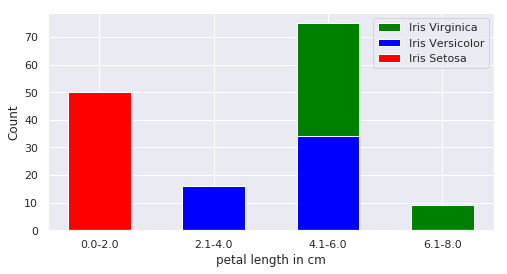

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plots the bar chart
fig = plt.figure(figsize=(8, 4))
sns.set(font_scale=1)
categories = ["0.0-2.0", "2.1-4.0", "4.1-6.0", "6.1-8.0"]
p1 = plt.bar(categories, irissetosacount, 0.55, color='red')
p2 = plt.bar(categories, irisversicolorcount, 0.55, bottom=irissetosacount, color='blue')
p3 = plt.bar(categories, irisvirginicacount, 0.55, bottom=irisversicolorcount, color='green')
plt.legend((p3[0], p2[0], p1[0]), ('Iris Virginica', 'Iris Versicolor', 'Iris Setosa'))
plt.xlabel('petal length in cm')
plt.ylabel('Count')
plt.show()

In [0]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 188.48


In [0]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")  

Degrees of Freedom: 6


In [0]:
# with Scipy 

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 188.48
P-value: 5.354817569315289e-38
Degrees of Freedom: 6
Expected: 
 [[16.66666667  5.33333333 25.          3.        ]
 [16.66666667  5.33333333 25.          3.        ]
 [16.66666667  5.33333333 25.          3.        ]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)